<a href="https://colab.research.google.com/github/arkaslittlemind/Machine-Learning-ITA6016/blob/main/01-08-2023%20Task%204%20ML%20LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name - Arkadipta Mojumder**

**Registration Number - 22MCA0201**

**Task 4 - CNN on Penguin dataset**

In [ ]:
import pandas as pd
import numpy as np
import os
# Plotting libraries
import matplotlib.pyplot as plt
# SKLearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [ ]:
penguin_data = pd.read_csv("penguins.csv")

**Preprocessing**

In [ ]:
penguin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [ ]:
penguin_data.head(10)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,7,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,8,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


In [ ]:
penguin_data = penguin_data.dropna()
penguin_data = penguin_data[penguin_data['sex'] != '.']
penguin_data.isna().any()

Unnamed: 0           False
species              False
island               False
bill_length_mm       False
bill_depth_mm        False
flipper_length_mm    False
body_mass_g          False
sex                  False
year                 False
dtype: bool

**Preparing dataset**

In [ ]:
#One hot encoding
one_hot_encoded = pd.get_dummies(penguin_data[['sex', 'island']])
penguin_data.drop(['island', 'sex'], axis = 1, inplace = True)
penguin_data = pd.concat([penguin_data, one_hot_encoded], axis = 1)
penguin_data

,Unnamed: 0,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_female,sex_male,island_Biscoe,island_Dream,island_Torgersen
0,1,Adelie,39.1,18.7,181.0,3750.0,2007,0,1,0,0,1
1,2,Adelie,39.5,17.4,186.0,3800.0,2007,1,0,0,0,1
2,3,Adelie,40.3,18.0,195.0,3250.0,2007,1,0,0,0,1
4,5,Adelie,36.7,19.3,193.0,3450.0,2007,1,0,0,0,1
5,6,Adelie,39.3,20.6,190.0,3650.0,2007,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,55.8,19.8,207.0,4000.0,2009,0,1,0,1,0
340,341,Chinstrap,43.5,18.1,202.0,3400.0,2009,1,0,0,1,0
341,342,Chinstrap,49.6,18.2,193.0,3775.0,2009,0,1,0,1,0
342,343,Chinstrap,50.8,19.0,210.0,4100.0,2009,0,1,0,1,0


In [ ]:
X = penguin_data.loc[:, penguin_data.columns != 'species']
y = penguin_data.loc[:, ['species']]

In [ ]:
y_end = LabelEncoder().fit_transform(y)
y_label = tf.keras.utils.to_categorical(y_end)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.3)

In [ ]:
print(f"Train shape : {X_train.shape}, Y Train : {y_train.shape}")
print(X_train.shape[1:])

Train shape : (233, 11), Y Train : (233, 3)
(11,)


In [ ]:
def get_model():
    model = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(500, activation='relu'),
        keras.layers.Dense(200, activation='relu',),
        keras.layers.Dense(3, activation='softmax')
    ])

    return model

In [ ]:
model = get_model()

# Compile the model
model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               6000      
                                                                 
 dense_1 (Dense)             (None, 200)               100200    
                                                                 
 dense_2 (Dense)             (None, 3)                 603       
                                                                 
Total params: 106,803
Trainable params: 106,803
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose = 1)

Epoch 1/30
8/8 [==============================] - 2s 47ms/step - loss: 242.2726 - accuracy: 0.3519 - val_loss: 198.9735 - val_accuracy: 0.3200
Epoch 2/30
8/8 [==============================] - 0s 12ms/step - loss: 116.9643 - accuracy: 0.5837 - val_loss: 63.3924 - val_accuracy: 0.2700
Epoch 3/30
8/8 [==============================] - 0s 13ms/step - loss: 44.6350 - accuracy: 0.4936 - val_loss: 16.9714 - val_accuracy: 0.6800
Epoch 4/30
8/8 [==============================] - 0s 11ms/step - loss: 10.0658 - accuracy: 0.6738 - val_loss: 10.8250 - val_accuracy: 0.7400
Epoch 5/30
8/8 [==============================] - 0s 17ms/step - loss: 6.4248 - accuracy: 0.7983 - val_loss: 0.6606 - val_accuracy: 0.9400
Epoch 6/30
8/8 [==============================] - 0s 24ms/step - loss: 3.2928 - accuracy: 0.8670 - val_loss: 2.1661 - val_accuracy: 0.9400
Epoch 7/30
8/8 [==============================] - 0s 18ms/step - loss: 3.0175 - accuracy: 0.8670 - val_loss: 2.7187 - val_accuracy: 0.8000
Epoch 8/30
8/8 [

In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.9861 - accuracy: 0.9500


[0.9861079454421997, 0.949999988079071]

**Performance Monitor**

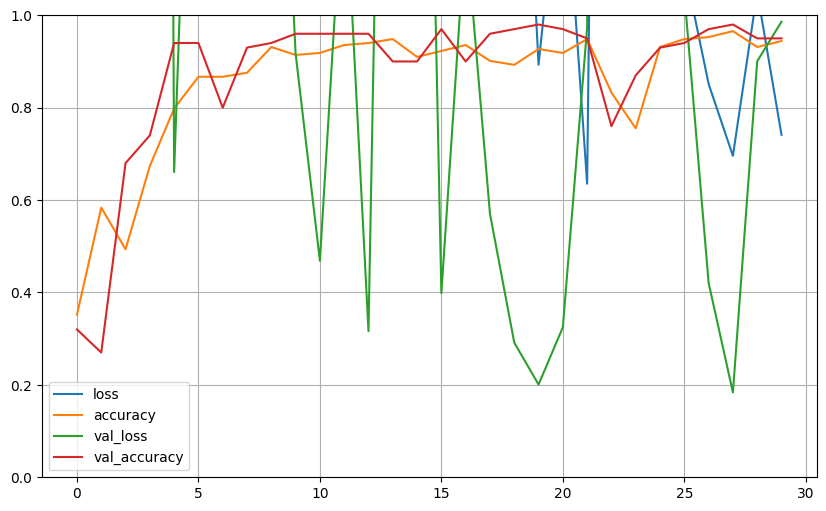

In [ ]:
pd.DataFrame(history.history).plot(figsize = (10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()